# Importer les données

In [228]:
import pandas as pd

df = pd.read_excel(r'C:\Users\Dylan\Desktop\UdeM_H22\PSY4016_traitementDeDonnees\Base_donnees_APES_modifications.xlsx', header = 0)
#df pour manipuler et tester le code plus rapidement
#!!!le df utilisé pour le reste du code est a priori df_short!!!!
df_short = df[['Age', 'Origine', 'IMC', 'Height', 'Sex']]


#Importer la colonne qui décrit le format de chaque variable (nominale, échelle) pour savoir ultérieurement
#si il faut que la colonne soit en string ou en int/float
df_var_descrip = pd.read_excel(r'C:\Users\Dylan\Desktop\Honor\APES\description_variables_col_ACE.xlsx', header = 0)
#df_var_descrip.head()
df.head()

,UID,Sex,Age,Height,Weight,IMC,Group,Origine,Revenu_individuel,Revenu_fam,...,Age_OC_Bi,TIME_Réveil,TIME_30min,TIME_14h,TIME_16h,TIME_Bedtime,TIME_DIFF_Réveil_30min,TIME_DIFF_30min_14h,TIME_DIFF_14h_16h,TIME_DIFF_16h_Bedtime
0,ACE-0044,0,38,1.70,74.00,25.6,0,4,2.0,2.0,...,NaN,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!
1,ACE-0087,0,26,1.87,NaN,NaN,0,1,1.0,1.0,...,NaN,09:53:00,10:25:40,14:06:00,16:07:30,22:42:20,00:32:40,03:40:20,02:01:30,06:34:50
2,ACE-0023,0,38,1.80,86.18,26.6,1,1,1.0,1.0,...,NaN,06:36:00,07:22:40,#NULL!,#NULL!,22:50:00,00:46:40,#NULL!,#NULL!,#NULL!
3,ACE-0082,0,22,1.96,84.00,21.9,1,2,1.0,1.0,...,NaN,07:40:00,08:10:00,14:20:00,16:20:00,22:40:00,00:30:00,06:10:00,02:00:00,06:20:00
4,ACE-0045,0,28,1.81,73.00,22.3,1,3,1.0,1.0,...,NaN,07:30:40,08:04:00,14:06:00,16:00:30,21:18:20,00:33:20,06:02:00,01:54:30,05:17:50


In [76]:
df_short.head()

,Age,Origine,IMC,Height,Sex
0,38,4,25.6,1.70,0
1,26,1,NaN,1.87,0
2,38,1,26.6,1.80,0
3,22,2,21.9,1.96,0
4,28,3,22.3,1.81,0


In [90]:
#faire un pair plot avec des valeurs numériques selon un hue, qui sert de variable
#catégorielle
import seaborn as sns
%matplotlib inline
sns.set()
sns.pairplot(df, hue='Origine', height=2)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000020C4AA5F1C0> (for post_execute):


KeyboardInterrupt: 

## Algorithme de prédiction des étiquettes

In [78]:
import sklearn
import numpy as np
from sklearn import model_selection
from sklearn import naive_bayes
# Étape 1 : choisir classe de modèle et les hyperparameters du modèle
model = naive_bayes.GaussianNB() #créer le modèle 

#Étape 2 et 3 : créer les données X et Y (définir les paramètres)
#Isoler la variable catégorielle dans un autre df pour faire des prédictions
X_df = df_short.drop('Origine', axis=1)
y_df = df_short['Origine']

# Étape 4 : adapter le modèle aux données
model.fit(X_df, y_df) #implémente la base de données

#cadre de données = X_iris -> contient les colonnes sepal_length, sepal_width, petal_lengt, petal_width
# il va apprendre les caractéristiques Y_iris -> species.

# Étape 5 : appliquer le modèle
y_model = model.predict(X_df) #prédiction

#ici ERREUR, on voit des erreurs dans la prédiction de l'algorithme -> devrait être 100%. 
# problème, nous avons appliqué le modèle sur le même cadre de données... 
# On appelle ceci un erreur de généralisation
# il faut l'appliquée sur un nouveau modèle, des nouvelles données!

# Afficher la précision des prédictions
print(f'Prediction accuracy {sklearn.metrics.accuracy_score(y_df, y_model):.2%}')
#print(f'Prediction accuracy {model.metrics.accuracy_score(y_iris, y_model):.2%}')


ValueError: could not convert string to float: '32yo'

<div class="alert alert-block alert-success">
    
## Missing values et nettoyages des données

<div class="alert alert-info">

## Pseudocode
## Section nettoyage des données
<p>
<li>Voir si le type de chaque colonne est ce qui est attendu
<li>Si le type de cellule ne correspond pas à ce qui est attendu, en faire le nettoyage en uniformisant
<li>Remplacer les valeurs manquantes par une valeur commune
<li>
<li>

<div class="alert alert-block alert-success">
<b>Vérifier que chaque valeurs pour chaque colonne est de format (str, int, float) approprié.</b>

In [148]:
#Importer les variable sous forme de liste pour y faire référence dans les prochaines étapes
columns = df.columns.values.tolist()

#Boucle qui parcours toutes les cellules du df pour vérifier si le type de la cellule correspond à ce qui est attendue
#Si le type ne correspond pas, il est modifié


<div class="alert alert-block alert-success">
<b>Boucle qui parcourt chaque cellule et qui vérifie le type de données dans ces cellules. 
Si une cellule est un string et qu'il est attendue que cette cellule soit de type int ou float,
on veut extraire le float de la cellule en retirant la partie string de la cellule et ainsi 
modifier la cellule avec la bonne valeur.</b>

In [171]:

#on retire le premier élément puisque c'est l'ID des participants
#to_rm = columns[0]
#columns.remove(to_rm)
#columns = df.columns.values.tolist().pop(0)

#fonction pour retirer des lettre qui se seraient insérées dans des cellules de type int ou float
#Cette fonction ne prend pas en compte la première colonne d'un dataframe pour la simple raison
#que la première colonne est de type str, car elle contient les id. des participants
##Attention : Cette fonctino ne tient pas compte si il est normal qu'une cellule contienne des lettre**


def clean_str_for_num(data_frame,col_type): 
    columns = data_frame.columns.values.tolist()
    #print(columns)
    
    #Remove de df toutes les colonnes qui sont sensées contenir des strings
    #Cela va empêcher de retirer des lettres aux cellules de type nominales ou catégorielles,
    #mais seulement les cellules de type continue ou à échelle où des lettres se seraient glissées
    #par erreur
    
    #to_remove = columns[0]
    #columns.remove(to_remove)
    #columns = data_frame.columns.values.tolist().pop(0)
    #print(columns)
    for col in columns:
        compteur = 0
    #print(f'la colonne est présentement {col}')
        print(col)
        type = data_frame[col].dtype
        col_type = df_var_descrip['Niveau de mesure'] 
        if type != col_type[compteur]:
            print('Ok') 
            for index in range(len(data_frame)):
                #print(data_frame[col])
                for i in [data_frame[col][index]]: 
                    cell =  i 
            
                    #print(cell)   
                    ##loop qui prend un cellule str et qui donne un int
                    if type(cell) is str:
                        temp = cell
                        for position in cell:
                    
                            #prend un caractère de string à la position i
                            #Si le caractère n'est pas un nombre, on retire ce caract
                            if position.isdigit() is False:
                                cell = cell.replace(position, ' ')
                        print(f'La cellule à la colonne {col} et à la ligne {index} était {temp} mais a été changée pour {cell} ' )
                        
                            #string = float(string)
                        data_frame.replace(i, cell, inplace = True)
                    #ploc[index].at[col] = cell
                #else: 
                 #   print(f'La valeur {cell} est good')
                #print(type(cell))
    

In [205]:
#Boucle pour formater le type de valeur qui est attendue dans une cellule e.g. nominale, échelle
#pour str ou float64. Cela sert à ensuite faire la vérification entre la cellule du df et ce qui est attendu en terme de type
#E.g. si pour l'index 1, on est sensé avoir une valeur nominale, on va encoder str.
for position in range(0,len(df_var_descrip)):
    if df_var_descrip.iat[position,0] == 'Nominales':
        print(position)
        new_cell = 'str'
        df_var_descrip.replace(df_var_descrip.iat[position,0], new_cell, inplace = True)
        print('le changement a été fait pour un string')
    elif df_var_descrip.iat[position,0] == 'Echelle':
        new_cell = 'float64'
        df_var_descrip.replace(df_var_descrip.iat[position,0], new_cell, inplace = True)
        print('le changement a été fait pour un string')

print(df_var_descrip)

    Niveau de mesure
0                str
1                str
2            float64
3            float64
4            float64
..               ...
288          float64
289          float64
290          float64
291          float64
292          float64

[293 rows x 1 columns]


In [170]:
    #Remove de df toutes les colonnes qui sont sensées contenir des strings
    #Cela va empêcher de retirer des lettres aux cellules de type nominales ou catégorielles,
    #mais seulemecolumns = data_frame.columns.values.tolist()
    #print(columns)
    
    #Remove de df toutes les colonnes qui sont sensées contenir des strings
    #Cela va empêcher de retirer des lettres aux cellules de type nominales ou catégorielles,
    #mais seulement les cellules de type continue ou à échelle où des lettres se seraient glissées
    #par erreur
    
    #to_remove = columns[0]
    #columns.remove(to_remove)
    #columns = data_frame.columns.values.tolist().pop(0)
    #print(columns)
for col in columns:
    compteur = 0
    #print(f'la colonne est présentement {col}')
    print(col)
    #type : type de la colonne 
    type = data_frame[col].dtype
    col_type = df_var_descrip['Niveau de mesure'] 
    if type != col_type[compteur]:
        print('PAS Ok') 
        for index in range(len(data_frame)):
            #print(data_frame[col])
            for i in [data_frame[col][index]]: 
                cell =  i 
            
                #print(cell)   
                ##loop qui prend un cellule str et qui donne un int
                if type(cell) is str:
                    temp = cell
                    for position in cell:
                    
                        #prend un caractère de string à la position i
                        #Si le caractère n'est pas un nombre, on retire ce caract
                        if position.isdigit() is False:
                            cell = cell.replace(position, ' ')
                    print(f'La cellule à la colonne {col} et à la ligne {index} était {temp} mais a été changée pour {cell} ' )
                        
                            #string = float(string)
                    data_frame.replace(i, cell, inplace = True)
    compteur = compteur + 1          
                #else: 
                 #   print(f'La valeur {cell} est good')
                #print(type(cell))nt les cellules de type continue ou à échelle où des lettres se seraient glissées
    #par erreur
    

    

IndentationError: expected an indented block after 'for' statement on line 6 (Temp/ipykernel_213456/916829115.py, line 7)

In [ ]:
compteur = 0
for col in columns:
   
    for index in range(len(data_frame)):
         #type : type de la cellule
    type = data_frame[col][index].dtype
            #print(data_frame[col])
        if type != col_type[compteur]:
            print('PAS Ok')     
            
 ##****rendu ici, reste à comparer si le type de la cell est ce qui est attendu avec la position de la colonne (index de df_var_descrip )
    #si ce ne l'est pas --> on va venir appliquer le cleareur de string
    
    #print(f'la colonne est présentement {col}')
    print(col)
    #type : type de la colonne 
    type = data_frame[col].dtype
    col_type = df_var_descrip['Niveau de mesure'] 
    if type != col_type[compteur]:
        print('PAS Ok') 
        for index in range(len(data_frame)):
            #print(data_frame[col])
            for i in [data_frame[col][index]]: 
                cell =  i 
            
                #print(cell)   
                ##loop qui prend un cellule str et qui donne un int
                if type(cell) is str:
                    temp = cell
                    for position in cell:
                    
                        #prend un caractère de string à la position i
                        #Si le caractère n'est pas un nombre, on retire ce caract
                        if position.isdigit() is False:
                            cell = cell.replace(position, ' ')
                    print(f'La cellule à la colonne {col} et à la ligne {index} était {temp} mais a été changée pour {cell} ' )
                        
                            #string = float(string)
                    data_frame.replace(i, cell, inplace = True)
    compteur = compteur + 1          
                #else: 
                 #   print(f'La valeur {cell} est good')
                #print(type(cell))nt les cellules de type continue ou à échelle où des lettres se seraient glissées
    #par erreur
    

    

In [149]:
#voir le type de données pour chaque colonne
#puis uniformiser les valeurs manquantes pour qu'elles soient toutes NaN
#Cela permettra par la suite de remplacer ces valeurs par e.g. la moyenne ou la médiane de la colonne

for col in columns:
    print(col)
    type = df[col].dtype
    #type = type(cell)
    print(f'Le type de valeur pour la colonne {col} est {type}')
    for index in range(0, len(df)):
        prev_value = df[col][index]
        valeur = df[col][index]
        if valeur == ' 'or valeur == '#NULL!' or valeur == 'NaN':
            df[col][index] = valeur.replace(valeur, "nan")
        
            print(f'la valeur à la position {col} {index} était {prev_value} a été modifiée pour {df[col][index]}')
    

UID
Le type de valeur pour la colonne UID est object
Sex
Le type de valeur pour la colonne Sex est object
Age
Le type de valeur pour la colonne Age est object
Height
Le type de valeur pour la colonne Height est float64
Weight
Le type de valeur pour la colonne Weight est float64
IMC
Le type de valeur pour la colonne IMC est float64
Group
Le type de valeur pour la colonne Group est int64
Origine
Le type de valeur pour la colonne Origine est int64
Revenu_individuel
Le type de valeur pour la colonne Revenu_individuel est float64
Revenu_fam
Le type de valeur pour la colonne Revenu_fam est float64
Etat_civil
Le type de valeur pour la colonne Etat_civil est int64
Fumeur
Le type de valeur pour la colonne Fumeur est int64
Alcool
Le type de valeur pour la colonne Alcool est float64
Drogue
Le type de valeur pour la colonne Drogue est int64
Medicament
Le type de valeur pour la colonne Medicament est int64
Prob_Psy_Fam
Le type de valeur pour la colonne Prob_Psy_Fam est int64
Contraception
Le type d

C:\Users\Dylan\AppData\Local\Temp/ipykernel_213456/2207914631.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][index] = valeur.replace(valeur, "nan")



la valeur à la position Time_Day3_Cort5 74 était #NULL! a été modifiée pour nan
Declarative_1
Le type de valeur pour la colonne Declarative_1 est float64
Rappel1_ajout
Le type de valeur pour la colonne Rappel1_ajout est float64
Declarative_2
Le type de valeur pour la colonne Declarative_2 est float64
Rappel2_ajout
Le type de valeur pour la colonne Rappel2_ajout est float64
Declarative_3
Le type de valeur pour la colonne Declarative_3 est float64
Rappel3_ajout
Le type de valeur pour la colonne Rappel3_ajout est float64
Declarative_4
Le type de valeur pour la colonne Declarative_4 est float64
rappel4_ajout
Le type de valeur pour la colonne rappel4_ajout est float64
Emo_R1_N1
Le type de valeur pour la colonne Emo_R1_N1 est float64
Emo_R1_E
Le type de valeur pour la colonne Emo_R1_E est float64
Emo_R1_N2
Le type de valeur pour la colonne Emo_R1_N2 est float64
Emo_R2_N1
Le type de valeur pour la colonne Emo_R2_N1 est float64
Emo_R2_E
Le type de valeur pour la colonne Emo_R2_E est float64
E

In [150]:
for col in columns:
    #print(col)
    bool = df[col].isnull().values.any()
    #type = type(cell)
    print(f'La colonne {col} contient au moins un NaN :  {bool}')

La colonne UID contient au moins un NaN :  False
La colonne Sex contient au moins un NaN :  False
La colonne Age contient au moins un NaN :  False
La colonne Height contient au moins un NaN :  False
La colonne Weight contient au moins un NaN :  True
La colonne IMC contient au moins un NaN :  True
La colonne Group contient au moins un NaN :  False
La colonne Origine contient au moins un NaN :  False
La colonne Revenu_individuel contient au moins un NaN :  True
La colonne Revenu_fam contient au moins un NaN :  True
La colonne Etat_civil contient au moins un NaN :  False
La colonne Fumeur contient au moins un NaN :  False
La colonne Alcool contient au moins un NaN :  True
La colonne Drogue contient au moins un NaN :  False
La colonne Medicament contient au moins un NaN :  False
La colonne Prob_Psy_Fam contient au moins un NaN :  False
La colonne Contraception contient au moins un NaN :  True
La colonne Evenement_majeure contient au moins un NaN :  True
La colonne ACEQ_01 contient au moins

In [89]:
clean_str_for_num(df)

TypeError: 'numpy.dtype[object_]' object is not callable

<div class="alert alert-block alert-success">
    
<b>Afficher toutes les cellules qui contiennent des nan</b>


In [38]:

import numpy as np
df_na_bool = []

#acquérir une liste de toutes les variables de df_short
ls_col = df_short.columns
print(ls_col)

#vÉRIFIER LES NAN pour une seule col à la fois
for col in columns :
    for index in range(0, len(df_short)):
        valeur = df_short[col][index]
        bool = np.isnan(valeur)
        df_na_bool.append(bool)
    
    na_index = pd.DataFrame([i for i, x in enumerate(df_na_bool) if x]) 
print(f'Le nombre de nan pour cette colonne est {na_index}' )

Index(['Age', 'Origine', 'IMC', 'Height', 'Sex'], dtype='object')


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [36]:

import numpy as np
df_na_bool = []

#acquérir une liste de toutes les variables de df_short
ls_col = df_short.columns
print(ls_col)

#vÉRIFIER LES NAN pour une seule col à la fois
for index in range(0,len(ls_col['']) :
    valeur = df_short['Age'][index]
    bool = np.isnan(valeur)
    df_na_bool.append(bool)
    
    na_index = pd.DataFrame([i for i, x in enumerate(df_na_bool) if x]) 
print(f'Le nombre de nan pour cette colonne est {na_index}' )

Index(['Age', 'Origine', 'IMC', 'Height', 'Sex'], dtype='object')


KeyError: 'variable'

<AxesSubplot:>

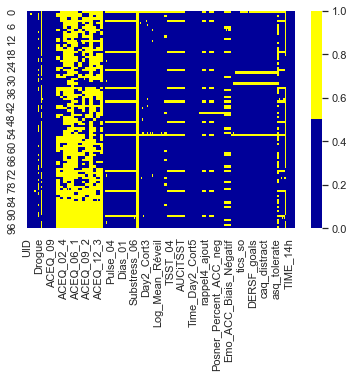

In [40]:
##MISSING DATA

#visualiser graphiquement si des données sont manquantes
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))



In [ ]:
#pourcentage de données manquantes dans le df

for col in df_short.columns:
    pct_missing = np.mean(df_short[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

In [ ]:
#Remplacer les valeurs manquantes par la moyenne ou la médiane
##ATTENION ICI DF_SHORT A ÉTÉ MODIFÉ 
#POUR CONSERVER LA DF ORIGINALE, IL VAUT MIEUX FAIRE UNE COPIE
mediane = df_short['IMC'].median()
print(mediane)
df_short['IMC'] = df['IMC'].fillna(mediane)

<div class="alert alert-info">

### Validation croisée (cross-validation) /  Entrainement / test

In [ ]:
#Extraction de deux groupes de données pour l'entrainement
Xtrain = X_df [:-25]
Xtest = X_df [-25:]
ytrain = y_df [:-25]
ytest = y_df [-25:]

In [ ]:
# 1. choisir la classe de modèle
# from sklearn.naive_bayes import GaussianNB

# 2. choisir les hyperparameters du modèle
model = naive_bayes.GaussianNB()

#ici même chose que vue plus bas
#composantes = ecomposition.PCA(n_components=2
#model = naive_bayes.GaussianNB().fit(composantes, ytrain)
#unscaled_clf = pipeline.make_pipeline(
#                            decomposition.PCA(n_components=2), 
#                            naive_bayes.GaussianNB())

# 3.  arranger les données
# from sklearn.model_selection import train_test_split
#créer deux cadres de données 
#train = entrainement de la création du modèle
#

Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(
                                                X_df, y_df,
                                                random_state=1)
#on créer un cadre de données 
# radom_state=1 -> permet de reproduire le même cadre de données
# chaque fois qu'on implémente selection.train_test_split -> ça va créer un nouveau cadre de données

# 4. adapter le modèle aux données
model.fit(Xtrain, ytrain)

#pour créer les règles = ytrain, il faut que ça soit appliqué sur notre cadre de données = Xtrain


# 5. appliquer le modèle à de nouvelles données
y_model = model.predict(Xtest)

#y_model va être prédit à partir du Xtest, et non le Xtrain
#permet de faire une prédiction sur un nouveau cadre de données, sinon erreur de généralisation

# Utilisez l'utilitaire accuracy_score
# pour afficher la fraction d'étiquettes prédites correspondant à leur valeur réelle:

sklearn.metrics.accuracy_score(ytest, y_model)

#fait le comparaison entre y test(qui doit être prédit) et le y_model qui était prédit.

# réussit à faire seulement 3 % d'erreur

# y_model réussit de prédire 97% des valeurs

# pas certain de cette section * utilise pas les données

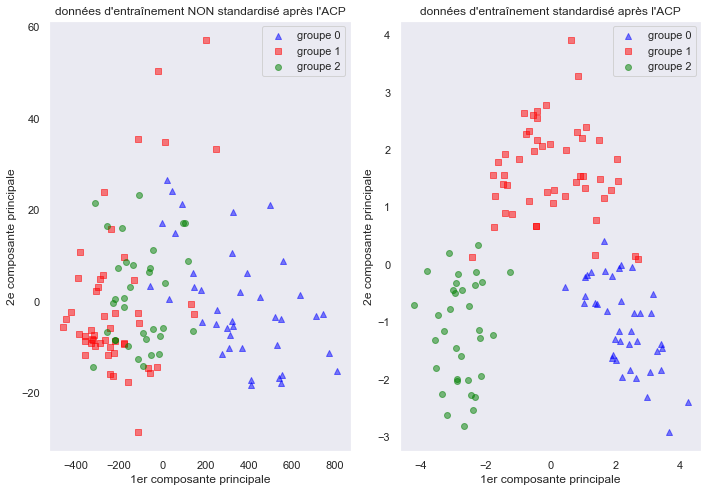

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
RANDOM_STATE = 42
FIG_SIZE = (10, 7)


#features, target = sklearn.datasets.load_wine(return_X_y=True)

from sklearn import datasets
features, target = datasets.load_wine(return_X_y=True)

from sklearn import model_selection
X_train, X_test, y_train, y_test =model_selection.train_test_split(features, target,
                                                    test_size=0.30,
                                                   random_state=RANDOM_STATE)

# Ajuster aux données et prédire à l'aide de GNB et l'ACP en pipeline (extraction des composantes).
# pour les données non mises à l'échelle

from sklearn import pipeline
from sklearn import decomposition
from sklearn import naive_bayes

# unscaled_clf = sklearn.pipeline.make_pipeline(decomposition.PCA(n_components=2), naive_bayes.GaussianNB())
unscaled_clf = pipeline.make_pipeline(
                            decomposition.PCA(n_components=2), #calcul les deux composantes les plus importantes
                            naive_bayes.GaussianNB()) # permet de faire la prédiction

unscaled_clf.fit(X_train, y_train) # prend les données de X_train et y_train


pred_test = unscaled_clf.predict(X_test)

# pour les données mises à l'échelle
# std_clf = sklearn.pipeline.make_pipeline(preprocessing.StandardScaler(), decomposition.PCA(n_components=2), naive_bayes.GaussianNB())
std_clf = pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(), #ajouter la standardisation
                                 decomposition.PCA(n_components=2),
                                 naive_bayes.GaussianNB())
std_clf.fit(X_train, y_train) #le fit
pred_test_std = std_clf.predict(X_test) # la prédiction 
pred_test_std

# Extraire l'ACP du pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Utiliser l'ACP sans et avec échelle sur les données X_train
# pour la visualisation.
X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualiser un ensemble de données standardisé
# ou non standardisé avec l'ACP effectuée
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='groupe %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='groupe %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('données d\'entraînement NON standardisé après l\'ACP')
ax2.set_title('données d\'entraînement standardisé après l\'ACP')

for ax in (ax1, ax2):
    ax.set_xlabel('1er composante principale')
    ax.set_ylabel('2e composante principale')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

In [ ]:
#Exercice : essayer d'implémenter la courbe ROC sur df_short

In [105]:
df_short.target

AttributeError: 'DataFrame' object has no attribute 'target'